# Output Analysis by CRYSTALpytools

The standard screen output files (.out or .outp files) generated by the 'crystal' and 'properties' executables of CRYSTAL package can be analyzed by CRYSTALpytools.

## The 'crystal_io.Crystal_output' class

Methods for 'crystal' output files are defined in the `crystal_io.Crystal_output` class. For phonon / spectra / thermodynamic / elastic properties, please refer to the corresponding modules. Here 'fundamental' properties are substracted.

### Geometry

Get geometry from SCF calculation. Return to a `geometry.CStructure` class, which is inherited from the `pymatgen.core.structure.Structure` class.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

struc = Crystal_output('out_mgoSCF.out').get_geometry()
print(struc)

Full Formula (Mg1 O1)
Reduced Formula: MgO
abc   :   2.981869   2.981869   2.981869
angles:  60.000000  60.000000  60.000000
pbc   :       True       True       True
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Mg    0    0    0
  1  O     0.5  0.5  0.5


Get the optimized structure from a 0D molecule optimization and writes the 'fort.34' (.gui) file.

**NOTE**

Currently, pymatgen symmetry analysis is limited to 3D systems. If symmetry is kept during optimization, use `symmetry=initial` to read the symmetry operators when calculaton starts.

In [2]:
from CRYSTALpytools.crystal_io import Crystal_output

struc = Crystal_output('out_coOpt.out').get_geometry(
    initial=False, write_gui=True, gui_name='out_coOpt.gui', symmetry='initial')
print(struc)
! cat out_coOpt.gui

Full Formula (C1 O1)
Reduced Formula: CO
abc   : 500.000000 500.000000 500.000000
angles:  90.000000  90.000000  90.000000
pbc   :      False      False      False
Sites (2)
  #  SP            a         b          c
---  ----  ---------  --------  ---------
  0  C     -0.000127  -8e-05    -6.4e-05
  1  O      0.001727   0.00108   0.000864
   0   1   1
  5.000000000000E+02  0.000000000000E+00  0.000000000000E+00
  0.000000000000E+00  5.000000000000E+02  0.000000000000E+00
  0.000000000000E+00  0.000000000000E+00  5.000000000000E+02
    1
      1.000000000000      0.000000000000      0.000000000000
      0.000000000000      1.000000000000      0.000000000000
      0.000000000000      0.000000000000      1.000000000000
      0.000000000000      0.000000000000      0.000000000000
    2
    6 -6.372620712800E-02 -3.982887945500E-02 -3.186310356400E-02
    8  8.637262071280E-01  5.398288794550E-01  4.318631035640E-01
    1    1


### Symmetry Operators

Get symmetry operators of the initial / last geometry with `initial` option to be True / False. It is consistent with CRYSTAL output file, i.e. in fractional coordinates of the cell.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_coOpt.out')
# Symmetry operators
print("Symmetry operators = \n %s \n" % out.get_symmops())

Symmetry operators = 
 [[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 0. 0.]]] 



### Basic Convergence

The `get_convergence()` method provides a basic method to substract SCF/OPT convergence information. More detailed information is available with `get_scf_convergence()` or `get_opt_convergence`.

In [2]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_coOpt.out')
out.get_convergence()
print('Final optimization energy {:.4f} eV'.format(out.final_energy))
print('Optimization energy difference (eV)')
print(out.opt_deltae)

Final optimization energy -3040.0635 eV
Optimization energy difference (eV)
[ 0.00000000e+00 -2.17745513e+00 -5.46948864e-03 -1.02859040e-03
 -2.17364553e-04 -1.47186388e-06]


`get_final_energy()` is a shortcut.

In [3]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_coOpt.out')
print('Final optimization energy {:.4f} eV'.format(out.get_final_energy()))

Final optimization energy -3040.0635 eV


### SCF convergence

Get SCF convergence history with the `get_scf_convergence()` method.

**NOTE**

1. The `scf_energy` attribute refers to the DFT total energy. The `final_energy` attribute includes empirical correction terms (DFT-D, gCP...). `final_energy` is valid only when `scf_status='converged'`.
2. Even though, in principle, this method also reads SCF from optimization output. To avoid ambiguity, use the `get_opt_convergence()` method with `scf_history=True`.

SCF convergence status = converged
SCF number of cycles = 8
Final energy = -7495.338004 eV


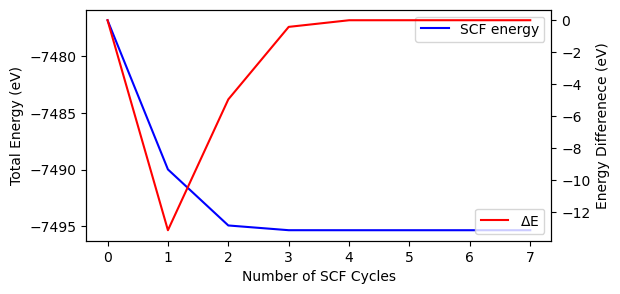

In [7]:
from CRYSTALpytools.crystal_io import Crystal_output
import matplotlib.pyplot as plt

out = Crystal_output('out_mgoSCF.out').get_scf_convergence()

print('SCF convergence status = {}'.format(out.scf_status))
print('SCF number of cycles = {:d}'.format(out.scf_cycles))
print('Final energy = {:.6f} eV'.format(out.final_energy))

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
x = [i for i in range(out.scf_cycles)]
ax.plot(x, out.scf_energy, 'b-', label='SCF energy')
ax.set_xlabel('Number of SCF Cycles')
ax.set_ylabel('Total Energy (eV)')
ax.legend()
ax2 = ax.twinx()
ax2.plot(x, out.scf_deltae, 'r-', label=r'$\Delta$E')
ax2.set_ylabel('Energy Differenece (eV)')
ax2.legend()

### Fermi energy

Get fermi energy (and history) from SCF calculation.

**NOTE**

For 'SPINLOCK', Fermi energy returns to 0. For insulators, Fermi energy returns to VBM.

In [6]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_gMVsaddleSCF.out').get_fermi_energy(history=True)

print('Converged Fermi energy = {:.2f} eV'.format(out[-1]))
print('Fermi energy history (eV):')
print(out)

Converged Fermi energy = -2.50 eV
Fermi energy history (eV):
[ 0.          0.          0.          0.          0.          0.
 -2.43921236 -2.43860653 -2.4399284  -2.49155123 -2.49509761 -2.49855836
 -2.50011667 -2.50167602 -2.50192865 -2.50190963 -2.50187654 -2.50197096]


### Band gap

Get band gap from SCF calculation.

**NOTE**

For 'SPINLOCK' or conducting systems, energy gap returns to 0.

In [5]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_gMVsaddleSCF.out').get_band_gap(history=True)

print('Converged gaps = alpha : {:.4f} eV; beta : {:.4f} eV'.format(out[-1,0], out[-1,1]))
print('Alpha-gap history:')
print(out[:, 0])

Converged gaps = alpha : 0.1204 eV; beta : 0.1205 eV
Alpha-gap history:
[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.1292
 0.1255 0.123  0.121  0.1201 0.1203 0.1204 0.1204 0.1204]


### Mulliken Charge

Get Mulliken charges of converged SCF / OPT calculations. The keyword 'PPAN' required. Currently it only reads charges per atom.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_gMVsaddleSCF.out').get_mulliken_charges()
print('Charges of atom 1: Total = {:.4f}; Alpha = {:.4f}; Beta = {:.4f}'.format(
    out[0, 0], out[0, 1], out[0, 2]
))

Charges of atom 1: Total = 6.0040; Alpha = 3.0020; Beta = 3.0020


### Optimization Convergence

Get optimization convergence history with `get_opt_convergence()` method.

**NOTE**

The `opt_energy` attribute refers to total DFT energy with corrections. The `opt_deltae` attribute refers to energy difference between 2 optimization steps.

OPT convergence status = converged
OPT number of cycles = 6
Final energy = -3040.063479 eV
Final RMS Gradient = 0.0003 Hartree/Bohr


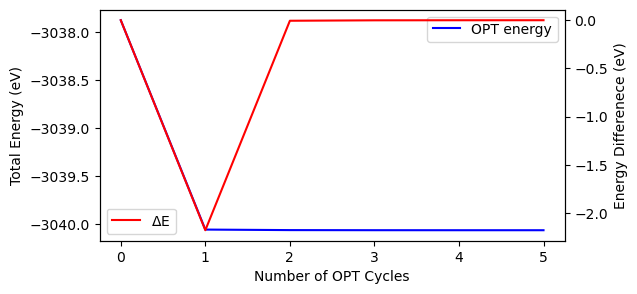

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output
import matplotlib.pyplot as plt

out = Crystal_output('out_coOpt.out').get_opt_convergence()
print('OPT convergence status = {}'.format(out.opt_status))
print('OPT number of cycles = {:d}'.format(out.opt_cycles))
print('Final energy = {:.6f} eV'.format(out.final_energy))
print('Final RMS Gradient = {:.4f} Hartree/Bohr'.format(out.opt_rmsgrad[-1]))

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
x = [i for i in range(out.opt_cycles)]
ax.plot(x, out.opt_energy, 'b-', label='OPT energy')
ax.set_xlabel('Number of OPT Cycles')
ax.set_ylabel('Total Energy (eV)')
ax.legend()
ax2 = ax.twinx()
ax2.plot(x, out.opt_deltae, 'r-', label=r'$\Delta$E')
ax2.set_ylabel('Energy Differenece (eV)')
ax2.legend()

The user can substract geometry and write into 'fort.34' (.gui) files with `write_gui=True` and `gui_name` option.

In [5]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_mgoOpt.out').get_opt_convergence(
    write_gui=True, gui_name='out_mgoOpt.optstory/optstep')

With the `scf_history` option the user can access the SCF energies at every optimization step via the `scf_energy` attribute. Note that where `scf_energy` is a 1\*nOptCycle list of arrays.

Read from 'SCFOUT.LOG' file. If `scflog` is not None, `scf_history` is set to 'True' automatically.

In [4]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_mgoOpt.out').get_opt_convergence(scflog='out_mgoOpt.SCFLOG')
print('SCF energy history of OPT step 2 (eV)')
print(out.scf_energy[1])

SCF energy history of OPT step 2 (eV)
[-7493.84141118 -7495.34015428 -7495.34062005 -7495.34066489
 -7495.34067826 -7495.34067824 -7495.34067825]


Also possible to get SCF history with 'ONELOG' keyword enabled.

In [6]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_mgoOptONELOG.out').get_opt_convergence(scf_history=True)
print('SCF energy history of OPT step 2 (eV)')
print(out.scf_energy[1])

SCF energy history of OPT step 2 (eV)
[-7493.84141118 -7495.34015428 -7495.34062005 -7495.34066489
 -7495.34067826 -7495.34067824 -7495.34067825]


### Forces

`grad=True` reads the RMS and MAX gradients just as the `get_opt_convergence()` method.

**NOTE**

This method typically gets forces available in the output file. For usual optimization setups, that means forces of the **INITIAL** geometry. To get forces of last optimization step, use 'ONELOG' keyword for optimization or provide SCFOUT.LOG file via the `scflog` option.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

out = Crystal_output('out_mgoOpt.out')
out.get_forces(grad=True, scflog='out_mgoOpt.SCFLOG')

print('Unit: Hartree/Bohr\n')
print("Forces on cell = \n %s \n\n Forces on atoms = \n %s \n\n RMS Gradient = \n %s \n\n" %
      (out.forces_cell[-1], out.forces_atoms[-1], out.opt_rmsgrad[-1]))

Unit: Hartree/Bohr

Forces on cell = 
 [[ 2.22325723e-06 -2.22325723e-06 -2.22325723e-06]
 [-2.22325723e-06  2.22325723e-06 -2.22325723e-06]
 [-2.22325723e-06 -2.22325723e-06  2.22325723e-06]] 

 Forces on atoms = 
 [[ 4.27329456e-16  3.87727906e-16  3.73283265e-16]
 [-4.08825739e-16 -4.07966347e-16 -3.73283265e-16]] 

 RMS Gradient = 
 3.1e-05 




## The 'crystal_io.Properties_output' class

This class is developed mostly for external file formats rather than the screen output, which has been discussed thoroughly in other modules.

The screen output is used mostly for auxiliary proposes, which has been tested by calling other methods.

### Geometry

A quick test of the `get_geometry()` method.

In [4]:
from CRYSTALpytools.crystal_io import Properties_output

out = Properties_output('out_mgo.outp')
out.get_geometry()

Structure Summary
Lattice
    abc : 2.9818692962636706 2.9818692962636706 2.9818692962636706
 angles : 60.00000000000001 60.00000000000001 60.00000000000001
 volume : 18.747821578249994
      A : 0.0 2.1085 2.1085
      B : 2.1085 0.0 2.1085
      C : 2.1085 2.1085 0.0
    pbc : True True True
PeriodicSite: Mg (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: O (2.108, 2.108, 2.108) [0.4999, 0.4999, 0.4999]

For more information, please refer to the module specific documentations.